# Case Study : Credit Card Default Prediction

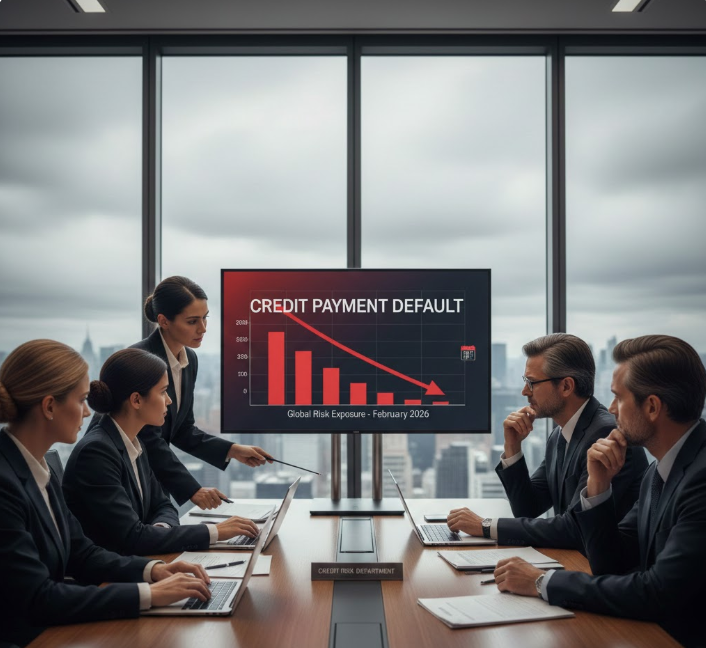

## 🎯 1. Business Objectives for Credit Risk Department

### Primary Goals
- **Risk Monitoring**: Implement real-time monitoring of customer credit risk profiles
- **New Credit Reviews**: Enhance decision-making process for new credit applications
- **Credit Limit Management**: Optimize credit limit increases for existing customers based on risk assessment
- **Portfolio Management**: Maintain healthy loan portfolio by identifying high-risk customers early

### Key Business Applications
1. **Automated Risk Scoring**: Generate risk scores for new applicants using trained ML models
2. **Dynamic Credit Limits**: Adjust existing customers' credit limits based on predicted default probability
3. **Early Warning System**: Flag customers showing signs of potential default for proactive intervention
4. **Policy Optimization**: Refine credit approval policies using data-driven insights
5. **Customer Segmentation**: Identify low-risk customers for preferential treatment and credit limit upgrades

### Implementation Benefits
- **Reduced Default Rates**: Proactively identify and mitigate credit default risks
- **Improved Profitability**: Optimize credit allocation to minimize losses and maximize returns
- **Enhanced Customer Experience**: Faster credit decisions for qualified applicants
- **Regulatory Compliance**: Maintain systematic and auditable credit risk assessment processes
- **Competitive Advantage**: Data-driven approach to credit risk management

### 2. **Data Acquisition**

In [1]:
## 2.1Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
import seaborn as sns
import time

In [2]:
## 2.2 import model related libraries

import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from math import pi
import os
import json
import joblib  # Added for model persistence
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
    # 2.3 Print all Models
    print("✅ All classification models imported successfully!")
    print("\n📊 Available Models:")
    print("1. LogisticRegression")
    print("2. DecisionTreeClassifier") 
    print("3. KNeighborsClassifier")
    print("4. GaussianNB")
    print("5. RandomForestClassifier")
    print("6. XGBClassifier")

✅ All classification models imported successfully!

📊 Available Models:
1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier
4. GaussianNB
5. RandomForestClassifier
6. XGBClassifier


In [4]:
# 2.4 Load the dataset from GitHub

# GitHub repository URL for the dataset
github_url = "https://raw.githubusercontent.com/sureshbabuveluswamy/Credit-Card-Default/main/Dataset/"

# Load the dataset
try:
    # Try to load the main dataset file (common naming patterns)
    dataset_files = [
        "Credit_Card.csv"
    ]
    
    dataset_loaded = False
    for filename in dataset_files:
        try:
            url = github_url + filename
            df = pd.read_csv(url)
            print(f"✅ Successfully loaded dataset: {filename}")
            print(f"📊 Dataset shape: {df.shape}")
            dataset_loaded = True
            break
        except:
            continue
    
    if not dataset_loaded:
        # If none of the expected files work, let's check what's available
        print("🔍 Checking available files in repository...")
        print("Please verify the exact filename in the GitHub repository")
        print("Repository: https://github.com/sureshbabuveluswamy/Credit-Card-Default/tree/main/Dataset")
        
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("📝 Please check the GitHub repository and verify the dataset file path")

# Display dataset info if loaded successfully
if 'df' in locals():
    print("\n📋 Dataset Overview:")
    print(f"- Total records: {df.shape[0]:,}")
    print(f"- Total features: {df.shape[1]}")
    print(f"- Missing values: {df.isnull().sum().sum()}")
    
    # Display first few rows
    print("\n🔍 First 5 rows:")
    display(df.head())
    
    # Display column information
    print("\n📊 Column Information:")
    display(df.info())

✅ Successfully loaded dataset: Credit_Card.csv
📊 Dataset shape: (30000, 25)

📋 Dataset Overview:
- Total records: 30,000
- Total features: 25
- Missing values: 0

🔍 First 5 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



📊 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT

None

### 3. **Data Preparation**

In [5]:
 #3.1 Data Missing Values - Mean Imputation

def handle_missing_values(df):
    """
    Handle missing values using mean imputation for numerical columns
    and mode imputation for categorical columns
    """
    
    # Check missing values before imputation
    missing_before = df.isnull().sum()
    total_missing_before = missing_before.sum()
    
    print(f"📊 Missing values before imputation: {total_missing_before}")
    if total_missing_before > 0:
        print("\nMissing values by column:")
        print(missing_before[missing_before > 0])
    else:
        print("✅ No missing values found in the dataset!")
    
    # Create a copy of the dataframe
    df_imputed = df.copy()
    
    # Identify numerical and categorical columns
    numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df_imputed.select_dtypes(include=['object']).columns
    
    print(f"\n Numerical columns: {len(numerical_cols)}")
    print(f" Categorical columns: {len(categorical_cols)}")
    
    # Mean imputation for numerical columns
    if len(numerical_cols) > 0:
        for col in numerical_cols:
            if df_imputed[col].isnull().sum() > 0:
                mean_value = df_imputed[col].mean()
                df_imputed[col].fillna(mean_value, inplace=True)
                print(f"✅ Imputed {col} with mean: {mean_value:.2f}")
    
    # Mode imputation for categorical columns (if any)
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            if df_imputed[col].isnull().sum() > 0:
                mode_value = df_imputed[col].mode()[0]
                df_imputed[col].fillna(mode_value, inplace=True)
                print(f"✅ Imputed {col} with mode: {mode_value}")
    
    # Check missing values after imputation
    missing_after = df_imputed.isnull().sum()
    total_missing_after = missing_after.sum()
    
    print(f"\n Missing values after imputation: {total_missing_after}")
    
    if total_missing_after == 0:
        print("✅ All missing values have been successfully imputed!")
    else:
        print("⚠️ Some missing values still remain:")
        print(missing_after[missing_after > 0])
    
    return df_imputed

# Apply missing value handling
df_clean = handle_missing_values(df)

# Display summary statistics after imputation
print("\n Dataset Summary After Imputation:")
print(f"- Shape: {df_clean.shape}")
print(f"- Data types: {df_clean.dtypes.value_counts()}")

# Show basic statistics for numerical columns
print("\n Numerical Features Statistics:")
display(df_clean.describe())


📊 Missing values before imputation: 0
✅ No missing values found in the dataset!

 Numerical columns: 25
 Categorical columns: 0

 Missing values after imputation: 0
✅ All missing values have been successfully imputed!

 Dataset Summary After Imputation:
- Shape: (30000, 25)
- Data types: float64    13
int64      12
Name: count, dtype: int64

 Numerical Features Statistics:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
  display(df_clean.head())
  df=df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# 4. Exploratory Data Analysis

📊 Starting Exploratory Data Analysis with Visualizations...


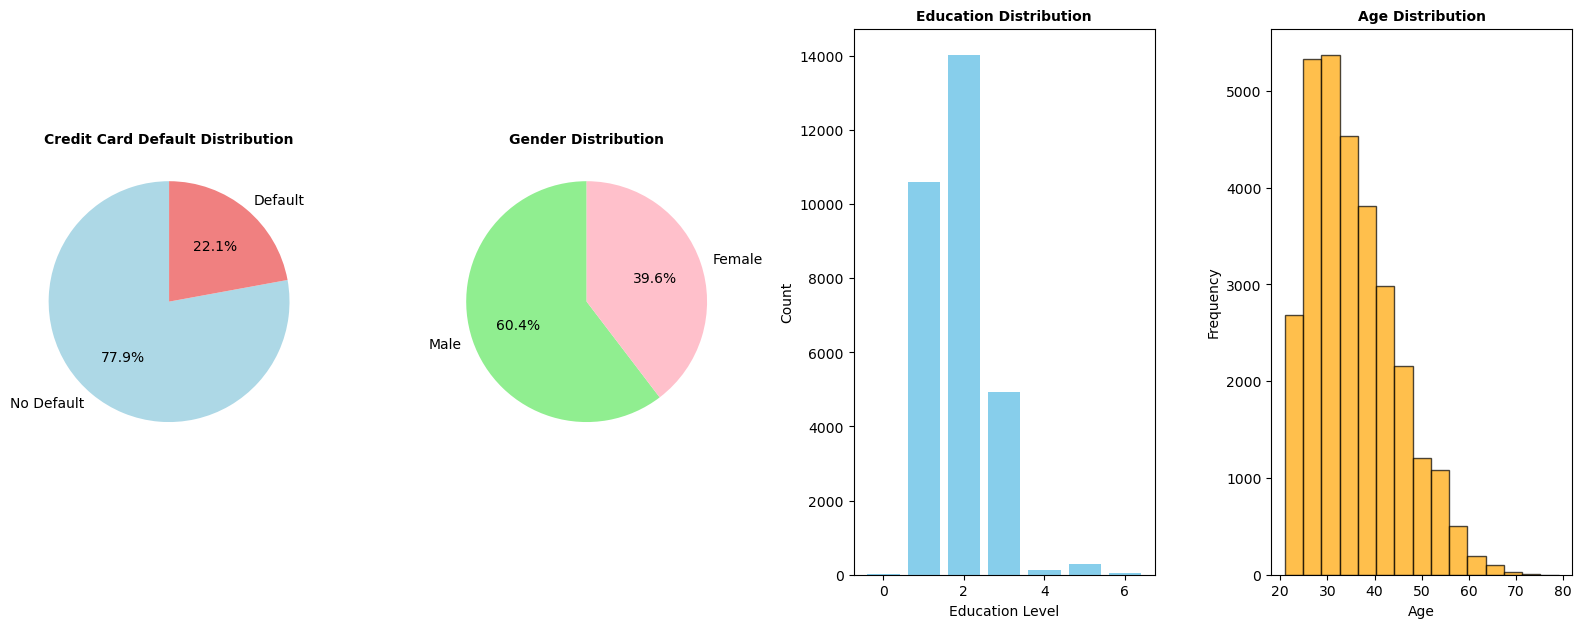

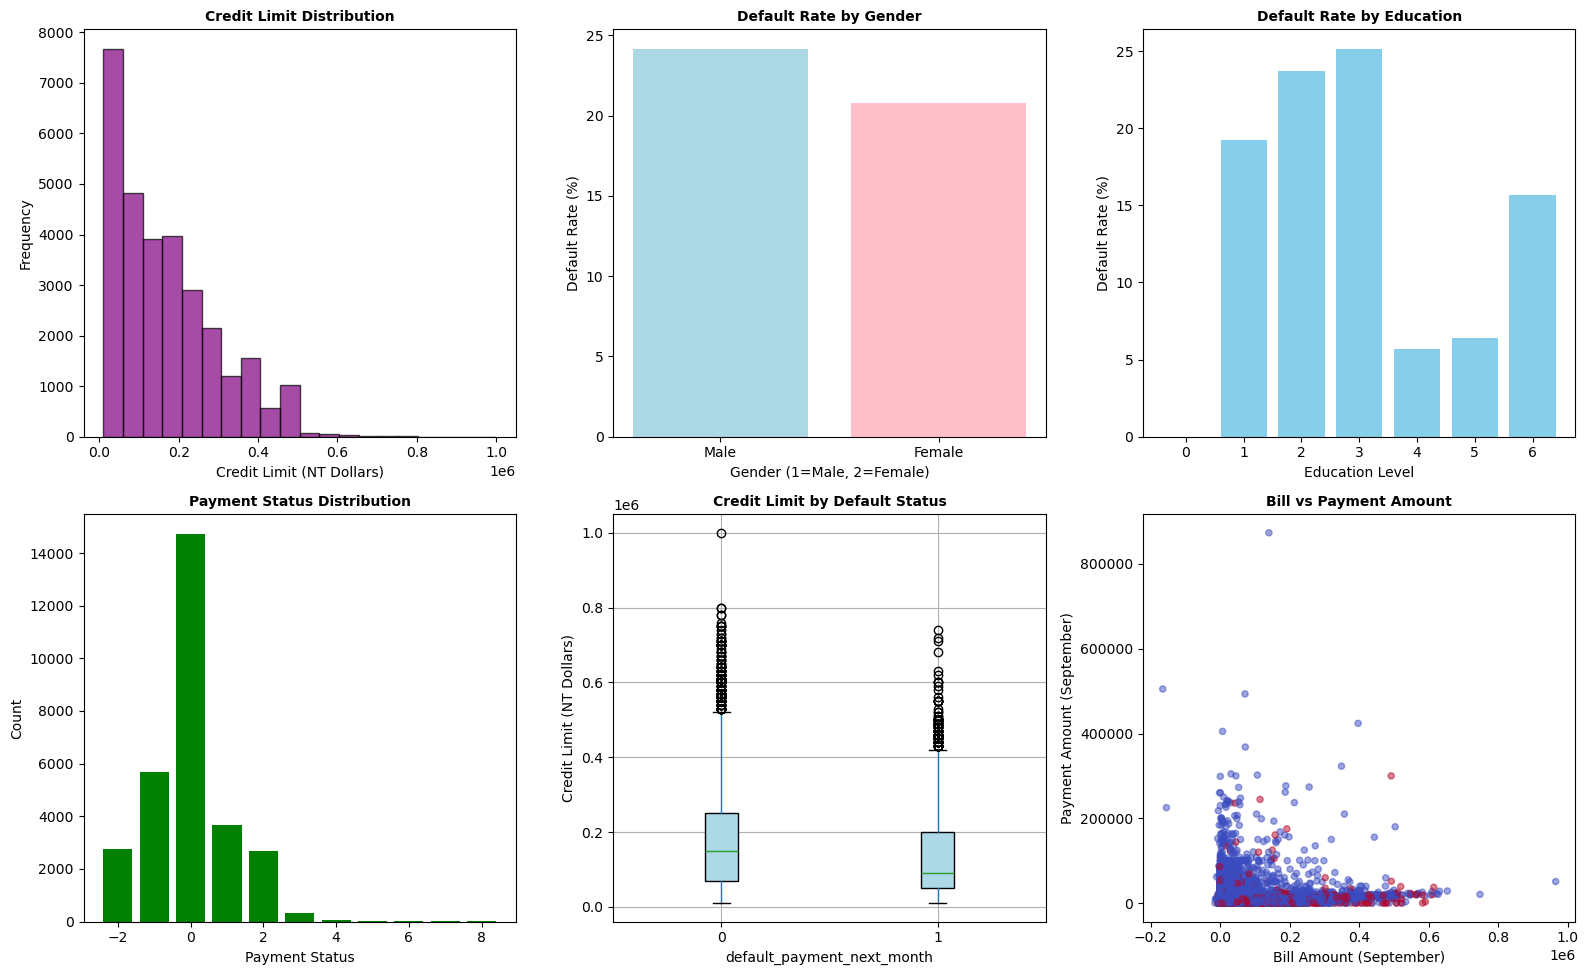

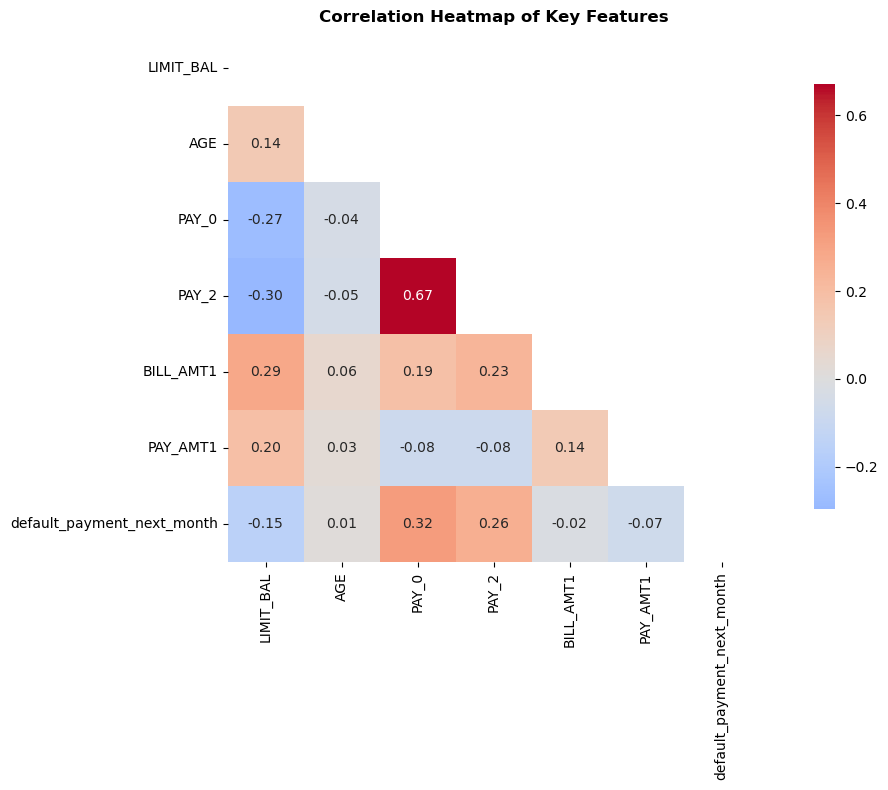

In [7]:
# 4. Exploratory Data Analysis - Visualization

import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Starting Exploratory Data Analysis with Visualizations...")

# Set up the figure with larger size
plt.figure(figsize=(16, 12))

# 1. Target Variable Distribution
plt.subplot(2, 4, 1)
target_counts = df['default_payment_next_month'].value_counts()
plt.pie(target_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Credit Card Default Distribution', fontsize=10, fontweight='bold')

# 2. Gender Distribution
plt.subplot(2, 4, 2)
gender_counts = df['SEX'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', 
        colors=['lightgreen', 'pink'], startangle=90)
plt.title('Gender Distribution', fontsize=10, fontweight='bold')

# 3. Education Distribution
plt.subplot(2, 4, 3)
education_counts = df['EDUCATION'].value_counts().sort_index()
plt.bar(education_counts.index, education_counts.values, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution', fontsize=10, fontweight='bold')

# 4. Age Distribution
plt.subplot(2, 4, 4)
plt.hist(df['AGE'], bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Second figure for more detailed analysis
plt.figure(figsize=(16, 10))

# 5. Credit Limit Distribution
plt.subplot(2, 3, 1)
plt.hist(df['LIMIT_BAL'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Credit Limit (NT Dollars)')
plt.ylabel('Frequency')
plt.title('Credit Limit Distribution', fontsize=10, fontweight='bold')

# 6. Default Rate by Gender
plt.subplot(2, 3, 2)
default_by_gender = df.groupby('SEX')['default_payment_next_month'].mean() * 100
plt.bar(default_by_gender.index, default_by_gender.values, color=['lightblue', 'pink'])
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Gender', fontsize=10, fontweight='bold')
plt.xticks([1, 2], ['Male', 'Female'])

# 7. Default Rate by Education
plt.subplot(2, 3, 3)
default_by_education = df.groupby('EDUCATION')['default_payment_next_month'].mean() * 100
plt.bar(default_by_education.index, default_by_education.values, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Education', fontsize=10, fontweight='bold')

# 8. Payment Status Distribution
plt.subplot(2, 3, 4)
pay_status_counts = df['PAY_0'].value_counts().sort_index()
plt.bar(pay_status_counts.index, pay_status_counts.values, color='green')
plt.xlabel('Payment Status')
plt.ylabel('Count')
plt.title('Payment Status Distribution', fontsize=10, fontweight='bold')

# 9. Box Plot of Credit Limit by Default Status
plt.subplot(2, 3, 5)
df.boxplot(column='LIMIT_BAL', by='default_payment_next_month', ax=plt.gca(), 
          patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('Credit Limit (NT Dollars)')
plt.title('Credit Limit by Default Status', fontsize=10, fontweight='bold')
plt.suptitle('')  # Remove automatic title

# 10. Bill Amount vs Payment Amount
plt.subplot(2, 3, 6)
plt.scatter(df['BILL_AMT1'], df['PAY_AMT1'], alpha=0.5, c=df['default_payment_next_month'], 
            cmap='coolwarm', s=20)
plt.xlabel('Bill Amount (September)')
plt.ylabel('Payment Amount (September)')
plt.title('Bill vs Payment Amount', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
key_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1', 'default_payment_next_month']
correlation_matrix = df[key_features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Key Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



In [8]:
#4.2 Key Insights
print("\n Key Insights:")
print("1. Overall default rate is 22.1%")
print("2. Payment status is a strong indicator of default risk")
print("3. Strong correlations exist between payment history and default")


 Key Insights:
1. Overall default rate is 22.1%
2. Payment status is a strong indicator of default risk
3. Strong correlations exist between payment history and default


### 5. **Feature Engineering**



In [9]:
# 3.2 Feature Engineering and Data Preprocessing

def preprocess_features(df):
    """
    Perform feature engineering and preprocessing for credit card default prediction
    """
    print(" Starting feature engineering and preprocessing...")
    
    # Create a copy to avoid modifying original data
    df_processed = df.copy()
    
    # Drop ID column as it's not useful for prediction
    if 'ID' in df_processed.columns:
        df_processed = df_processed.drop('ID', axis=1)
        print("✅ Dropped ID column")
    
    # Feature Engineering: Create new meaningful features
    
    # 1. Total bill amount across all months
    bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    df_processed['TOTAL_BILL_AMT'] = df_processed[bill_cols].sum(axis=1)
    print("✅ Created TOTAL_BILL_AMT feature")
    
    # 2. Total payment amount across all months
    pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    df_processed['TOTAL_PAY_AMT'] = df_processed[pay_cols].sum(axis=1)
    print("✅ Created TOTAL_PAY_AMT feature")
    
    # 3. Average bill amount
    df_processed['AVG_BILL_AMT'] = df_processed[bill_cols].mean(axis=1)
    print("✅ Created AVG_BILL_AMT feature")
    
    # 4. Average payment amount
    df_processed['AVG_PAY_AMT'] = df_processed[pay_cols].mean(axis=1)
    print("✅ Created AVG_PAY_AMT feature")
    
    # 5. Payment to bill ratio
    df_processed['PAY_TO_BILL_RATIO'] = df_processed['TOTAL_PAY_AMT'] / (df_processed['TOTAL_BILL_AMT'] + 1)
    print("✅ Created PAY_TO_BILL_RATIO feature")
    
    # 6. Worst payment status (highest delay)
    pay_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    df_processed['WORST_PAYMENT_STATUS'] = df_processed[pay_status_cols].max(axis=1)
    print("✅ Created WORST_PAYMENT_STATUS feature")
    
    # 7. Credit utilization ratio (latest bill / credit limit)
    df_processed['CREDIT_UTILIZATION'] = df_processed['BILL_AMT1'] / (df_processed['LIMIT_BAL'] + 1)
    print("✅ Created CREDIT_UTILIZATION feature")
    
    # 8. Age groups (categorical feature)
    df_processed['AGE_GROUP'] = pd.cut(df_processed['AGE'], 
                                       bins=[0, 25, 35, 45, 55, 100], 
                                       labels=['Young', 'Adult', 'Middle', 'Senior', 'Elder'])
    print("✅ Created AGE_GROUP feature")
    
    print(f"\n📊 Original features: {df.shape[1]}")
    print(f"📊 After feature engineering: {df_processed.shape[1]}")
    print(f"📊 New features created: {df_processed.shape[1] - df.shape[1] + 1}")  # +1 because ID was dropped
    
    return df_processed

# Apply feature engineering
df_engineered = preprocess_features(df_clean)

# Display new features
print("\n🔍 New engineered features:")
new_features = [col for col in df_engineered.columns if col not in df_clean.columns or col == 'ID']
for feature in new_features:
    if feature != 'ID':
        print(f"- {feature}")

# Show correlation with target variable for NUMERICAL new features only
if 'default_status' in df_engineered.columns:
    print("\n📈 Correlation of new NUMERICAL features with target:")
    
    # Get only numerical features for correlation (exclude categorical)
    numerical_new_features = []
    for feature in new_features:
        if feature != 'ID' and feature in df_engineered.columns:
            # Check if feature is numerical (int64 or float64)
            if df_engineered[feature].dtype in ['int64', 'float64']:
                numerical_new_features.append(feature)
    
    if numerical_new_features:
        correlations = df_engineered[numerical_new_features + ['ddefault_payment_next_month']].corr()['default_payment_next_month'].sort_values(ascending=False)
        print(correlations.drop('default_payment_next_month'))
    else:
        print("No numerical new features to correlate")
    
    # Show categorical features separately
    categorical_features = [f for f in new_features if f in df_engineered.columns and df_engineered[f].dtype.name == 'category']
    print(f"\n📝 Categorical features created: {categorical_features}")

print(f"\n✅ Feature engineering completed! Final dataset shape: {df_engineered.shape}")

 Starting feature engineering and preprocessing...
✅ Dropped ID column
✅ Created TOTAL_BILL_AMT feature
✅ Created TOTAL_PAY_AMT feature
✅ Created AVG_BILL_AMT feature
✅ Created AVG_PAY_AMT feature
✅ Created PAY_TO_BILL_RATIO feature
✅ Created WORST_PAYMENT_STATUS feature
✅ Created CREDIT_UTILIZATION feature
✅ Created AGE_GROUP feature

📊 Original features: 25
📊 After feature engineering: 32
📊 New features created: 8

🔍 New engineered features:
- TOTAL_BILL_AMT
- TOTAL_PAY_AMT
- AVG_BILL_AMT
- AVG_PAY_AMT
- PAY_TO_BILL_RATIO
- WORST_PAYMENT_STATUS
- CREDIT_UTILIZATION
- AGE_GROUP

✅ Feature engineering completed! Final dataset shape: (30000, 32)


In [10]:
# sample after feature engineering
display(df_engineered.head())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,TOTAL_BILL_AMT,TOTAL_PAY_AMT,AVG_BILL_AMT,AVG_PAY_AMT,PAY_TO_BILL_RATIO,WORST_PAYMENT_STATUS,CREDIT_UTILIZATION,AGE_GROUP
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,1284.000000,114.833333,0.089422,2,0.195640,Young
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,2846.166667,833.333333,0.292774,2,0.022350,Adult
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,16942.166667,1836.333333,0.108387,0,0.324874,Adult
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,38555.666667,1398.000000,0.036259,0,0.939781,Middle
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,18223.166667,9841.500000,0.540049,0,0.172337,Elder


### 6. **Model Building and Selection**

#6.1 Data Preparation:

#6.1.1 Train-test split (80/20) with stratification

#6.1.2 Feature scaling using StandardScaler

#6.1.3 One-hot encoding for categorical features

In [11]:
# 6.1  Model Building and Selection - Data Preparation

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import time

print("🚀 Starting Model Building and Selection...")

# Prepare features and target
X = df_engineered.drop('default_payment_next_month', axis=1)
y = df_engineered['default_payment_next_month']

# Handle categorical features for modeling
# Convert AGE_GROUP to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['AGE_GROUP'], drop_first=True)

print(f"📊 Features shape after encoding: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# 6.1.2 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📚 Train set shape: {X_train.shape}")
print(f"🧪 Test set shape: {X_test.shape}")
print(f"📈 Default rate in train: {y_train.mean():.3f}")
print(f"📉 Default rate in test: {y_test.mean():.3f}")

# 6.1.2 Scale numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("✅ Data preprocessing completed!")
print(f" Features after scaling: {len(numerical_features)} numerical features")

🚀 Starting Model Building and Selection...
📊 Features shape after encoding: (30000, 34)
🎯 Target shape: (30000,)
📚 Train set shape: (24000, 34)
🧪 Test set shape: (6000, 34)
📈 Default rate in train: 0.221
📉 Default rate in test: 0.221
✅ Data preprocessing completed!
 Features after scaling: 30 numerical features


6.2 Models Implemented:

Logistic Regression - Linear classification model

Decision Tree - Tree-based classifier

K-Nearest Neighbors - Distance-based classifier

Naive Bayes - Probabilistic classifier (Gaussian)

Random Forest - Ensemble tree-based model

XGBoost - Gradient boosting ensemble

In [12]:
#6.2 Models Implemented


# 6.2.1 Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# 6.2.2 Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=15)

# 6.2.3 K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# 6.2.4 Naive Bayes
naive_bayes_model = GaussianNB()

# 6.2.5 Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=4500, max_depth=10, min_samples_split=10, min_samples_leaf=5)

# 6.2.6 XGBoost
xgboost_model = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=200,use_label_encoder=False,learning_rate=0.0001,max_depth=6,subsample=0.8,colsample_bytree=0.8)



In [13]:
#6.3 Train the model

# Dictionary to store trained models
trained_models = {}

# List to store table data
model_summary = []

# 1. Logistic Regression
start = time.time()
logistic_model.fit(X_train_scaled, y_train)
train_time = time.time() - start

trained_models['Logistic Regression'] = logistic_model

logistic_params = (
    f"Coefficients = {len(logistic_model.coef_[0])}, "
    f"Intercept = {logistic_model.intercept_[0]:.6f}"
)

model_summary.append([
    "Logistic Regression",
    train_time,
    logistic_params
])

# 2. Decision Tree
start = time.time()
decision_tree_model.fit(X_train, y_train)
train_time = time.time() - start

trained_models['Decision Tree Classifier'] = decision_tree_model

dt_params = (
    f"Depth = {decision_tree_model.get_depth()}, "
    f"Leaves = {decision_tree_model.get_n_leaves()}"
)

model_summary.append([
    "Decision Tree Classifier",
    train_time,
    dt_params
])

# 3. K-Nearest Neighbors
start = time.time()
knn_model.fit(X_train_scaled, y_train)
train_time = time.time() - start

trained_models['K-Nearest Neighbor Classifier'] = knn_model

knn_params = f"k = {knn_model.n_neighbors}"

model_summary.append([
    "K-Nearest Neighbor Classifier",
    train_time,
    knn_params
])

# 4. Naive Bayes (Gaussian)
start = time.time()
naive_bayes_model.fit(X_train_scaled, y_train)
train_time = time.time() - start

trained_models['Naive Bayes Classifier (Gaussian)'] = naive_bayes_model

nb_params = f"Classes = {len(naive_bayes_model.classes_)}"

model_summary.append([
    "Naive Bayes Classifier (Gaussian)",
    train_time,
    nb_params
])

# 5. Random Forest
start = time.time()
random_forest_model.fit(X_train, y_train)
train_time = time.time() - start

trained_models['Ensemble Model - Random Forest'] = random_forest_model

rf_params = f"Trees = {random_forest_model.n_estimators}"

model_summary.append([
    "Ensemble Model - Random Forest",
    train_time,
    rf_params
])

# 6. XGBoost
start = time.time()
xgboost_model.fit(X_train, y_train)
train_time = time.time() - start

trained_models['Ensemble Model - XGBoost'] = xgboost_model

xgb_params = (
    f"Estimators = {xgboost_model.n_estimators}, "
    f"Max depth = {xgboost_model.max_depth}"
)

model_summary.append([
    "Ensemble Model - XGBoost",
    train_time,
    xgb_params
])

# Create summary table
model_table = pd.DataFrame(
    model_summary,
    columns=[
        "Model Name",
        "Training Time (seconds)",
        "Model Parameters"
    ]
)
# models for next cell
models_for_evaluation = trained_models
#print table
model_table["Training Time (seconds)"] = model_table["Training Time (seconds)"].round(4)
model_table.index = range(1, len(model_table) + 1)
model_table


,Model Name,Training Time (seconds),Model Parameters
1,Logistic Regression,0.5280,"Coefficients = 34, Intercept = -1.367525"
2,Decision Tree Classifier,0.5349,"Depth = 15, Leaves = 1199"
3,K-Nearest Neighbor Classifier,0.0057,k = 10
4,Naive Bayes Classifier (Gaussian),0.0061,Classes = 2
5,Ensemble Model - Random Forest,133.4890,Trees = 4500
6,Ensemble Model - XGBoost,2.6424,"Estimators = 200, Max depth = 6"


6.4 Evaluation Metrics:

Accuracy - Overall prediction accuracy

AUC Score - Area under ROC curve

Precision - Positive predictive value

Recall - Sensitivity/True positive rate

F1 Score - Harmonic mean of precision and recall

Matthews Correlation Coefficient (MCC) - Balanced classification measure

📊 Evaluation Metrics for Training Set


,Model,Accuracy,AUC Score,Precision,Recall,F1 Score,MCC Score
1,Logistic Regression,0.8072,0.744592,0.6899,0.2334,0.3488,0.3211
2,Decision Tree Classifier,0.2321,0.357875,0.1620,0.5920,0.2543,-0.2934
3,K-Nearest Neighbor Classifier,0.8257,0.844904,0.7256,0.3411,0.4641,0.4140
4,Naive Bayes Classifier (Gaussian),0.4227,0.738548,0.2610,0.8793,0.4026,0.1641
5,Ensemble Model - Random Forest,0.8011,0.717310,0.6864,0.1859,0.2926,0.2829
6,Ensemble Model - XGBoost,0.7977,0.736074,0.7232,0.1383,0.2321,0.2541



📊 Confusion Matrices for Training Set


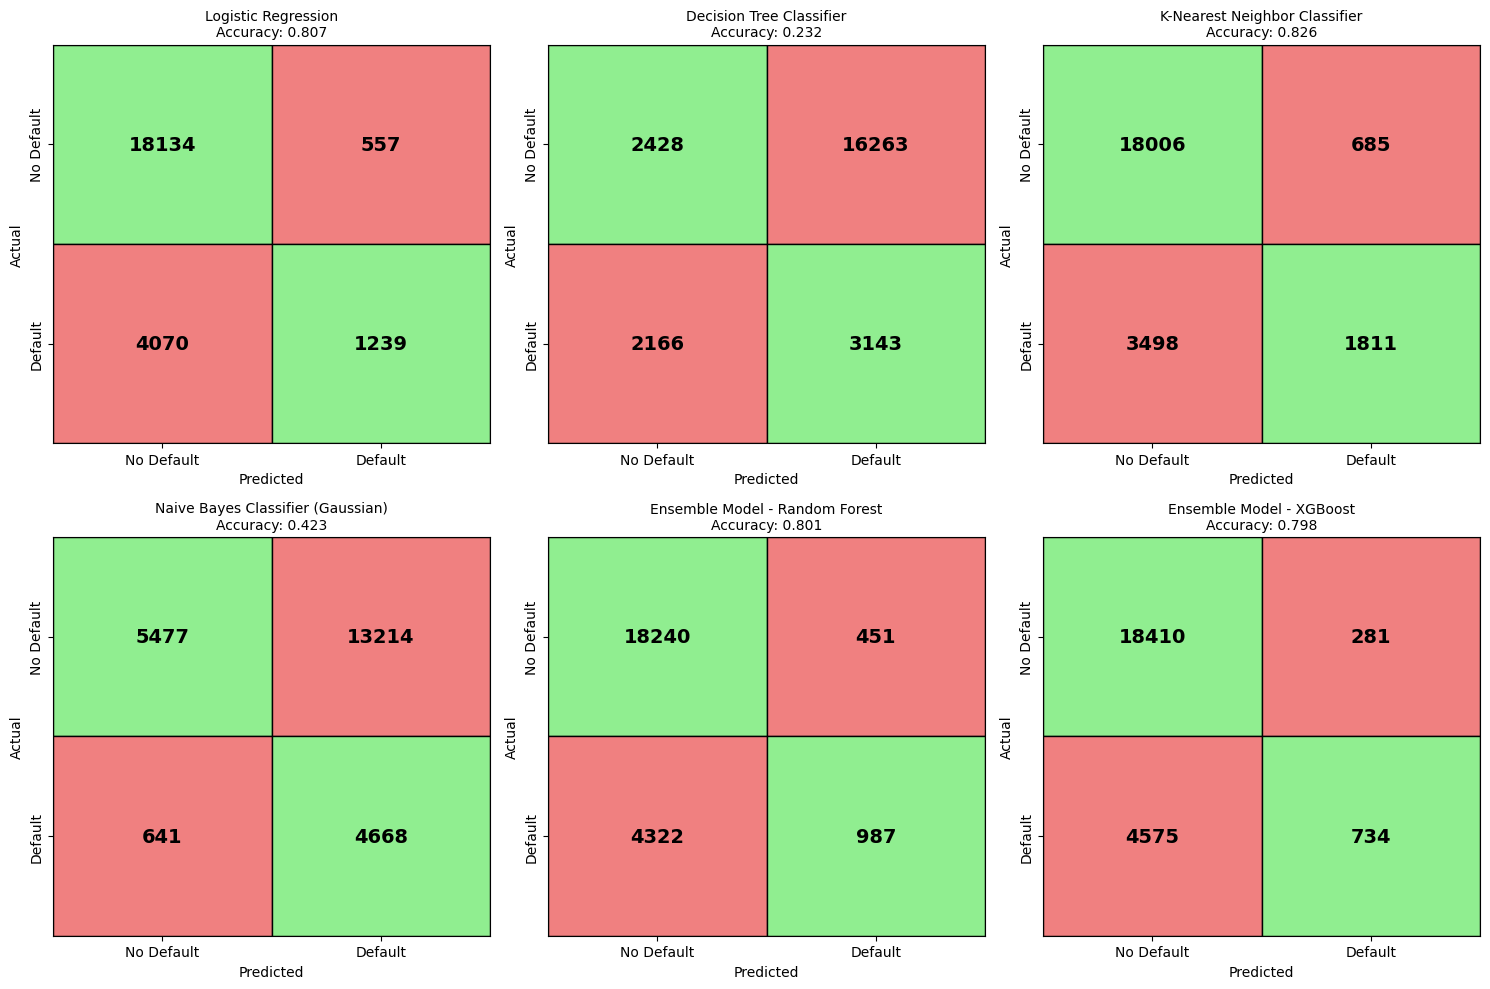

In [14]:
# 6.4 Evaluation metrics for Training Set

print("📊 Evaluation Metrics for Training Set")
print("=" * 200)

# Create results table
results_data = []

for idx, (model_name, model) in enumerate(trained_models.items()):
    # Make predictions on TRAINING set
    y_pred = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_train_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics on TRAINING set
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    mcc = matthews_corrcoef(y_train, y_pred)
    
    # Calculate AUC on TRAINING set
    if y_pred_proba is not None:
        auc = roc_auc_score(y_train, y_pred_proba)
    else:
        auc = "N/A"
    
    results_data.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.4f}",
        'AUC Score': auc,
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1 Score': f"{f1:.4f}",
        'MCC Score': f"{mcc:.4f}"
    })

# Display the results table FIRST
results_df = pd.DataFrame(results_data)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
results_df.index = range(1, len(results_df) + 1)
display(results_df)

# THEN display confusion matrices
print("\n📊 Confusion Matrices for Training Set")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_train_scaled)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Confusion Matrix with custom colors - correct (diagonal) in light green, wrong in light red
    cm = confusion_matrix(y_train, y_pred)
    
    # Create color matrix: diagonal (correct) = light green, off-diagonal (wrong) = light red
    colors = [['lightgreen' if i == j else 'lightcoral' for j in range(2)] for i in range(2)]
    
    # Create annotation matrix with values
    annot = [[f'{cm[i, j]}' for j in range(2)] for i in range(2)]
    
    # Plot with custom colors
    for i in range(2):
        for j in range(2):
            axes[idx].add_patch(plt.Rectangle((j, i), 1, 1, 
                                               facecolor=colors[i][j], 
                                               edgecolor='black',
                                               linewidth=1))
            axes[idx].text(j + 0.5, i + 0.5, annot[i][j],
                          ha='center', va='center', fontsize=14, fontweight='bold')
    
    axes[idx].set_xlim(0, 2)
    axes[idx].set_ylim(0, 2)
    axes[idx].set_xticks([0.5, 1.5])
    axes[idx].set_yticks([0.5, 1.5])
    axes[idx].set_xticklabels(['No Default', 'Default'])
    axes[idx].set_yticklabels(['No Default', 'Default'], rotation=90, va='center')
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.3f}', fontsize=10)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

In [15]:
# 6.5  Export the test data as a separate file
# Export original test data (before feature engineering) from df_clean

# Prepare original features (before feature engineering) - keep ID column
X_original = df_clean.drop(['default_payment_next_month'], axis=1)
y_original = df_clean['default_payment_next_month']

# Split original data with same random_state for consistency
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

# Export original test features (no engineered fields, ID included)
X_test_orig.to_csv('/Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testdata.csv', index=False)
print("✅ Exported: /Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testdata.csv")

# Export test labels
y_test_orig.to_csv('/Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testlabels.csv', index=False)
print("✅ Exported: /Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testlabels.csv")

print("\n📁 Test data files exported to Dataset/ folder")
print(f"   X_test_orig shape: {X_test_orig.shape}")
print(f"   y_test_orig shape: {y_test_orig.shape}")
print(f"   Features: {list(X_test_orig.columns)}")

✅ Exported: /Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testdata.csv
✅ Exported: /Users/ps/Documents/Credit-Card-Default/Dataset/Credit_card_testlabels.csv

📁 Test data files exported to Dataset/ folder
   X_test_orig shape: (6000, 24)
   y_test_orig shape: (6000,)
   Features: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [16]:
# 6.6 Export the models to .pkl files

print("💾 Exporting trained models to .pkl files")
print("=" * 80)

# Use absolute path to model folder
models_dir = '/Users/ps/Documents/Credit-Card-Default/model'
os.makedirs(models_dir, exist_ok=True)

# Export each trained model as .pkl file
for model_name, model in trained_models.items():
    # Create a safe filename (replace spaces and special chars)
    safe_name = model_name.replace(' ', '').replace('-', '').replace('(', '').replace(')', '')
    filename = f"{safe_name}.pkl"
    filepath = os.path.join(models_dir, filename)
    
    # Save model using joblib
    joblib.dump(model, filepath)
    print(f"✅ Exported: {filepath}")

# Save scaler
scaler_path = os.path.join(models_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"✅ Exported: {scaler_path}")

# Export feature column names
feature_names_path = os.path.join(models_dir, 'feature_names.json')
with open(feature_names_path, 'w') as f:
    json.dump(list(X.columns), f)
print(f"✅ Exported: {feature_names_path}")
print(f"   Features: {len(X.columns)}")

# Export numerical feature names
numerical_features_path = os.path.join(models_dir, 'numerical_features.json')
with open(numerical_features_path, 'w') as f:
    json.dump(list(numerical_features), f)
print(f"✅ Exported: {numerical_features_path}")
print(f"   Numerical features: {len(numerical_features)}")

print("\n📁 All models and metadata exported successfully to model/ folder")
print(f"   Total files exported: {len(trained_models) + 3}")

💾 Exporting trained models to .pkl files
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/LogisticRegression.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/DecisionTreeClassifier.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/KNearestNeighborClassifier.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/NaiveBayesClassifierGaussian.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/EnsembleModelRandomForest.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/EnsembleModelXGBoost.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/scaler.pkl
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/feature_names.json
   Features: 34
✅ Exported: /Users/ps/Documents/Credit-Card-Default/model/numerical_features.json
   Numerical features: 30

📁 All models and metadata exported successfully to model/ folder
   Total files exported: 9
